In [24]:
# Environment setting for the notebook with python==3.11.10
%pip install \
xarray==2024.7.0 \
pandas==2.2.2 \
numpy==2.1.1 \
matplotlib==3.9.2 \
scipy==1.14.1 \
cartopy==0.23.0 \
geopandas==1.0.1 \
zarr==2.18.1 \
cmocean==4.0.3 \
s3fs==2024.10.0

Note: you may need to restart the kernel to use updated packages.


# ZARR Demo for the dataset of `bom-reeftemp-sst`
#### This notebook demos how to use the Cloud Optimised Data (ZARR) of bom-reeftemp-sst to extract and plot variables.

In [25]:
import xarray as xr
import s3fs 
import matplotlib.pyplot as plt

### Connect to the data of `bom-reeftemp-sst` from s3

In [26]:
zarr_store = "s3://gbr-dms-data-public/bom-reeftemp-sst/data.zarr/"

fs = s3fs.S3FileSystem(anon=True)
data = xr.open_zarr(zarr_store, consolidated=True, storage_options={"anon": True})
data

<xarray.Dataset> Size: 109GB
Dimensions:           (lat: 800, lon: 700, time: 8073)
Coordinates:
  * lat               (lat) float32 3kB -25.49 -25.47 -25.45 ... -9.53 -9.51
  * lon               (lon) float32 3kB 142.0 142.0 142.1 ... 155.9 156.0 156.0
  * time              (time) datetime64[ns] 65kB 2002-03-19 ... 2024-04-29T15...
Data variables:
    sst1day           (time, lat, lon) float32 18GB ...
    sst_mosaic        (time, lat, lon) float32 18GB ...
    ssta1day          (time, lat, lon) float32 18GB ...
    ssta_leg1day      (time, lat, lon) float32 18GB ...
    ssta_mosaic_imos  (time, lat, lon) float32 18GB ...
    ssta_mosaic_leg   (time, lat, lon) float32 18GB ...
Attributes: (12/32)
    Conventions:                CF-1.5
    acknowledgement:            HRPT AVHRR experimental SSTskin retrievals we...
    author:                     Luke Garde and Claire Spillman
    author_email:               l.garde@bom.gov.au ; c.spillman@bom.gov.au
    cdm_data_type:              grid
    comment:                    NetCDF file contains 1-day SST and 14-day mos...
    ...                         ...
    source:                     AVHRR_D-ABOM-L2P-v01; ABOM-L4LRfnd-GLOB-GAMSS...
    spatial_resolution:         0.02
    start_time:                 N/A
    stop_time:                  N/A
    summary:                    ReefTemp Next Generation is a specialised rem...
    title:                      Nighttime Reeftemp: Next Generation (RTNG) SS...

#### Quick plot every variable of the latest datetime

sst1day


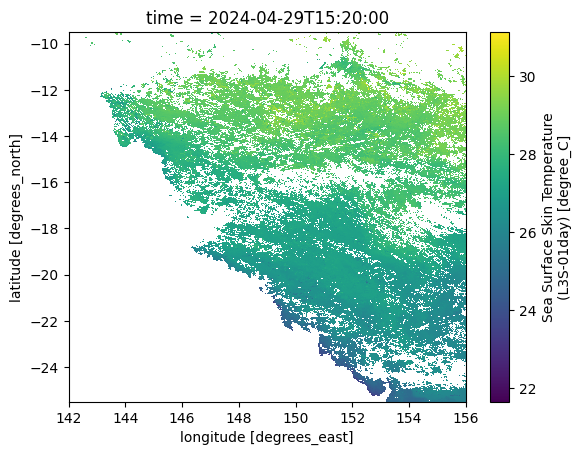

sst_mosaic


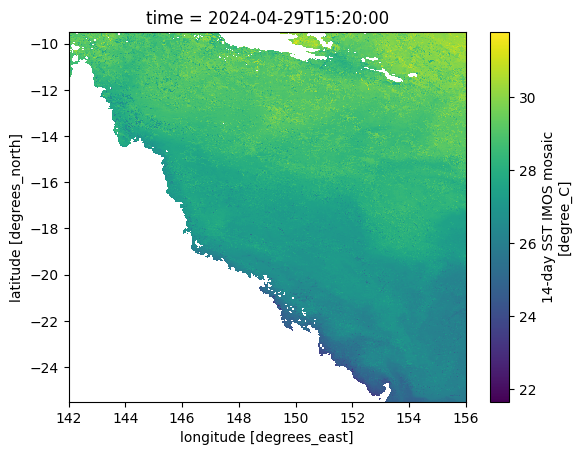

ssta1day


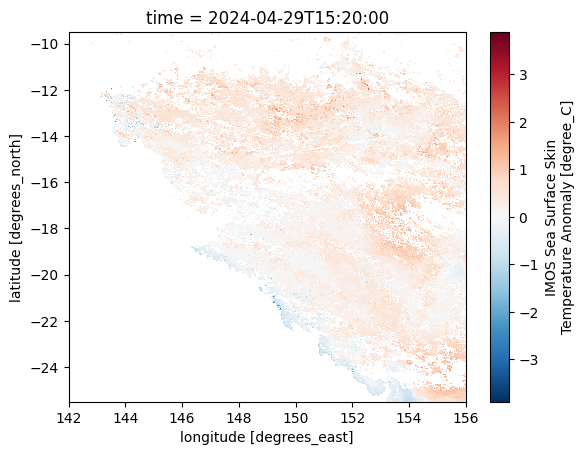

ssta_leg1day


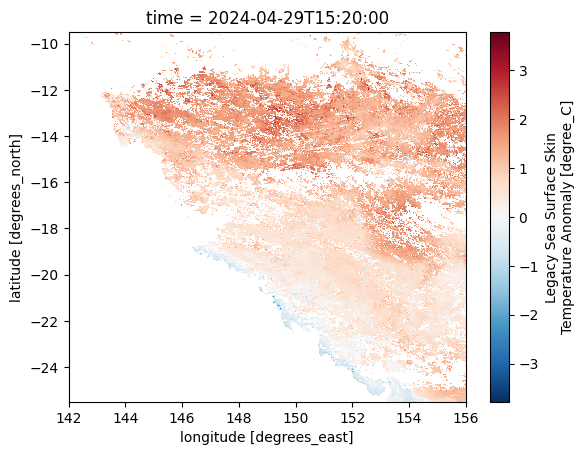

ssta_mosaic_imos


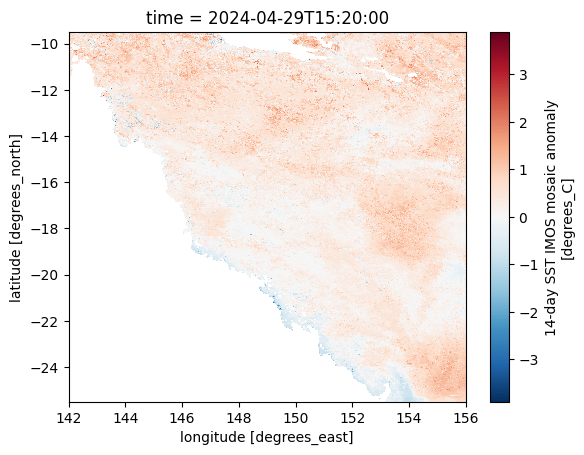

ssta_mosaic_leg


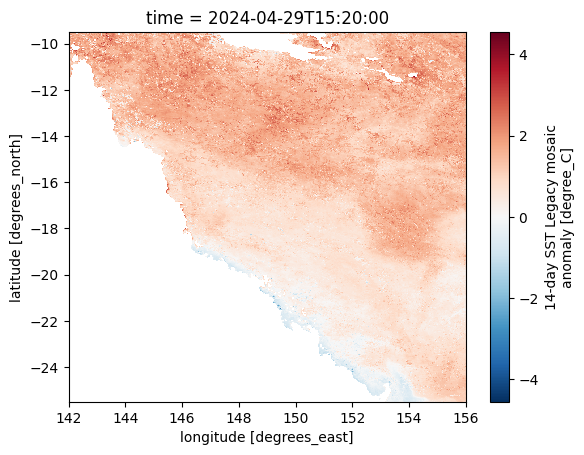

In [ ]:
for var in data.data_vars:
    print(var)
    try:
        data[var].isel(time=-1).plot()
        plt.show()
    except:
        continue

#### Analyst a week temperature changes for the variable `sst1day` on GBR region

In [28]:

sst1day_202403 = data.sel(time=slice('2024-03-01', '2024-03-07')).sst1day
sst1day_202403

<xarray.DataArray 'sst1day' (time: 7, lat: 800, lon: 700)> Size: 16MB
[3920000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 3kB -25.49 -25.47 -25.45 -25.43 ... -9.55 -9.53 -9.51
  * lon      (lon) float32 3kB 142.0 142.0 142.1 142.1 ... 155.9 156.0 156.0
  * time     (time) datetime64[ns] 56B 2024-03-01T15:20:00 ... 2024-03-07T15:...
Attributes:
    comment:                These SST values are representative of the top 10...
    feature_id:             http://sweet.jpl.nasa.gov/2.2/realmOcean.owl#Ocea...
    long_name:              Sea Surface Skin Temperature (L3S-01day)
    medium_id:              http://sweet.jpl.nasa.gov/2.2/matrWater.owl#SeaWater
    procedure_id:           IMOS_L3S_1_day
    scaledQuantityKind_id:  http://environment.data.gov.au/water/quality/def/...
    source:                 AVHRR_D
    substanceOrTaxon_id:    http://sweet.jpl.nasa.gov/2.2/matrWater.owl#SaltW...
    unit_id:                http://qudt.org/vocab/unit#DegreeCelsius
    units:                  degree_C
    valid_max:              50
    valid_min:              -50

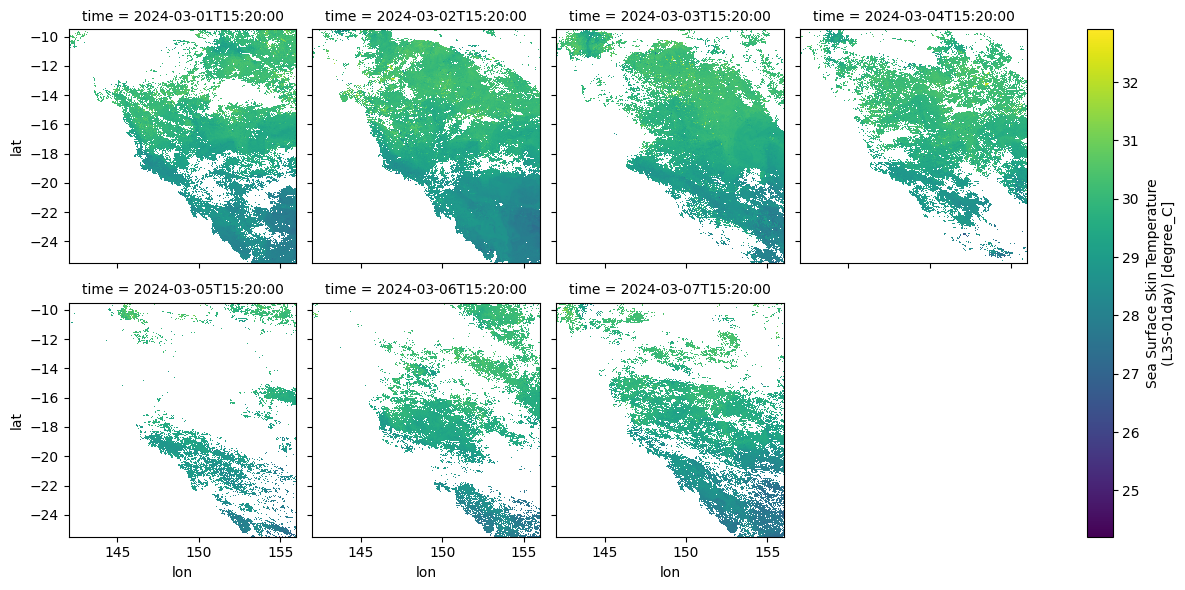

In [29]:
sst1day_202403.plot(col='time', col_wrap=4)

#### Quick plot of the variable of `sst1day` during 2024 summer period located at `Square Reef`
Google Map of `Square Reef` : https://www.google.com/maps/place/20%C2%B000'00.0%22S+150%C2%B000'00.0%22E/@-20.067047,149.812109,13.07z/data=!4m4!3m3!8m2!3d-20!4d150?authuser=0&entry=ttu&g_ep=EgoyMDI0MTIwMy4wIKXMDSoASAFQAw%3D%3D

In [30]:
Square_Reef_sst1day_2024 = data.sel(lat=-20.067047, lon=149.812109, method="nearest")\
    .sel(time=slice('2023-12-01', '2024-3-31'))\
    .sst1day
Square_Reef_sst1day_2024

<xarray.DataArray 'sst1day' (time: 122)> Size: 488B
[122 values with dtype=float32]
Coordinates:
    lat      float32 4B -20.07
    lon      float32 4B 149.8
  * time     (time) datetime64[ns] 976B 2023-12-01T15:20:00 ... 2024-03-31T15...
Attributes:
    comment:                These SST values are representative of the top 10...
    feature_id:             http://sweet.jpl.nasa.gov/2.2/realmOcean.owl#Ocea...
    long_name:              Sea Surface Skin Temperature (L3S-01day)
    medium_id:              http://sweet.jpl.nasa.gov/2.2/matrWater.owl#SeaWater
    procedure_id:           IMOS_L3S_1_day
    scaledQuantityKind_id:  http://environment.data.gov.au/water/quality/def/...
    source:                 AVHRR_D
    substanceOrTaxon_id:    http://sweet.jpl.nasa.gov/2.2/matrWater.owl#SaltW...
    unit_id:                http://qudt.org/vocab/unit#DegreeCelsius
    units:                  degree_C
    valid_max:              50
    valid_min:              -50

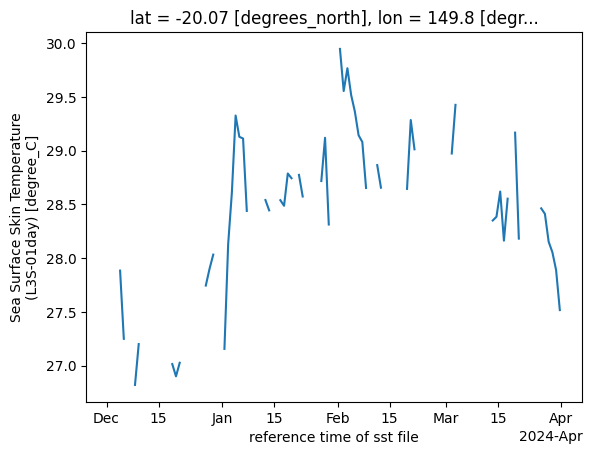

In [31]:
Square_Reef_sst1day_2024.plot()

#### Quick plot every variable during 2024 summer period located at `Square Reef`

sst1day


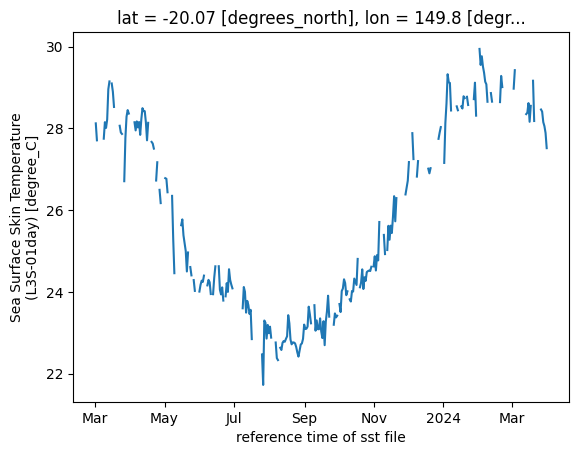

sst_mosaic


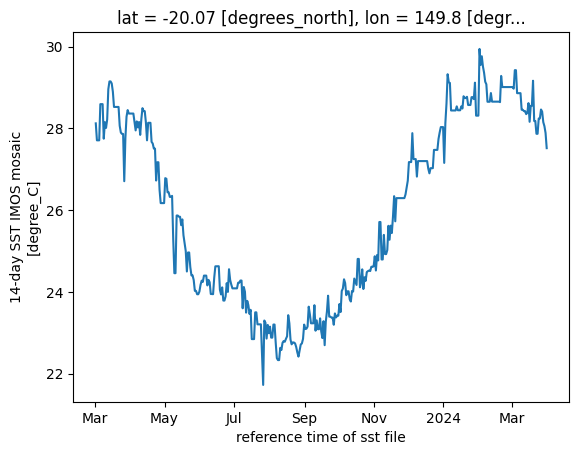

ssta1day


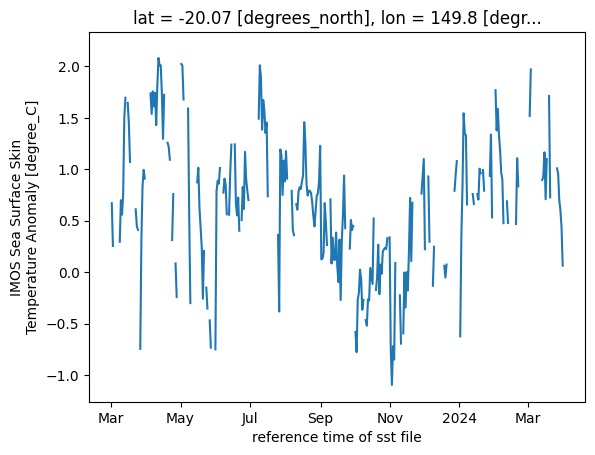

ssta_leg1day


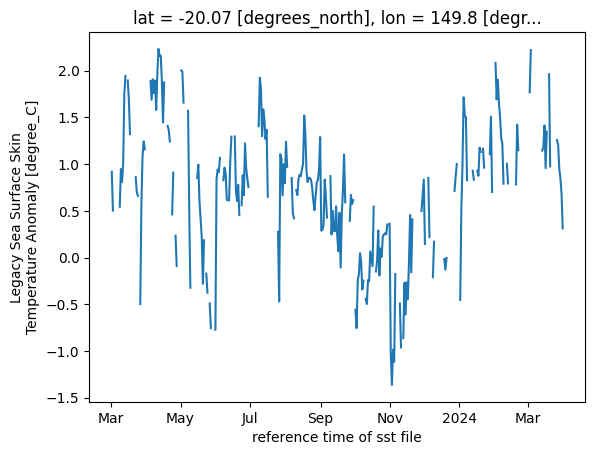

ssta_mosaic_imos


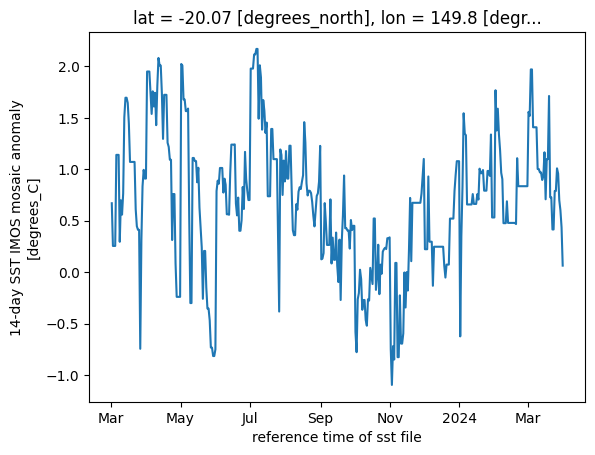

ssta_mosaic_leg


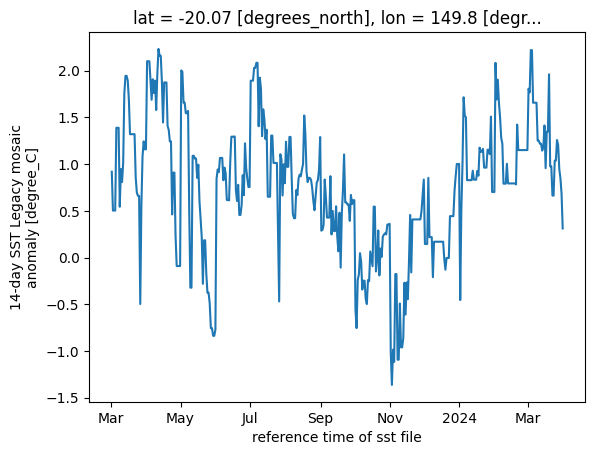

In [32]:
for var in data.data_vars:
    print(var)
    try:
        data[var].sel(lat=-20.067047, lon=149.812109, method="nearest")\
        .sel(time=slice('2023-03-01', '2024-03-31'))\
        .plot()
        plt.show()
    except:
        print(f"Could not plot {var}")
        continue

### Check the calculations using the entire grid
Below, we will create a new variable that will contain the `sst1day` data for 2024. 

We will then calculate a monthly mean and finally we plot the results to see the monthly mean temperature.

In [33]:
# Check the grouping and caculate speed with a whole year
sst1day_2024 = data.sst1day.sel(time=slice('2023-12-01', '2024-03-31'))
sst1day_2024

<xarray.DataArray 'sst1day' (time: 122, lat: 800, lon: 700)> Size: 273MB
[68320000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 3kB -25.49 -25.47 -25.45 -25.43 ... -9.55 -9.53 -9.51
  * lon      (lon) float32 3kB 142.0 142.0 142.1 142.1 ... 155.9 156.0 156.0
  * time     (time) datetime64[ns] 976B 2023-12-01T15:20:00 ... 2024-03-31T15...
Attributes:
    comment:                These SST values are representative of the top 10...
    feature_id:             http://sweet.jpl.nasa.gov/2.2/realmOcean.owl#Ocea...
    long_name:              Sea Surface Skin Temperature (L3S-01day)
    medium_id:              http://sweet.jpl.nasa.gov/2.2/matrWater.owl#SeaWater
    procedure_id:           IMOS_L3S_1_day
    scaledQuantityKind_id:  http://environment.data.gov.au/water/quality/def/...
    source:                 AVHRR_D
    substanceOrTaxon_id:    http://sweet.jpl.nasa.gov/2.2/matrWater.owl#SaltW...
    unit_id:                http://qudt.org/vocab/unit#DegreeCelsius
    units:                  degree_C
    valid_max:              50
    valid_min:              -50

In [34]:
sst1day_2024_monthly = sst1day_2024.groupby("time.month").mean()
sst1day_2024_monthly

<xarray.DataArray 'sst1day' (month: 4, lat: 800, lon: 700)> Size: 9MB
array([[[      nan,       nan,       nan, ..., 27.1943  , 27.148724,
         27.329878],
        [      nan,       nan,       nan, ..., 27.23931 , 27.305088,
         27.381802],
        [      nan,       nan,       nan, ..., 27.277155, 27.270844,
         27.329477],
        ...,
        [29.909245, 30.124771, 30.178106, ..., 30.586334, 30.567318,
         30.732319],
        [29.978106, 30.024773, 29.778107, ..., 30.591888, 30.535225,
         30.659689],
        [30.49799 , 30.019245, 30.124023, ..., 30.64041 , 30.61383 ,
         30.51586 ]],

       [[      nan,       nan,       nan, ..., 27.418575, 27.446877,
         27.41203 ],
        [      nan,       nan,       nan, ..., 27.417929, 27.46984 ,
         27.47511 ],
        [      nan,       nan,       nan, ..., 27.451216, 27.529078,
         27.479647],
...
        [29.950264, 29.945156, 30.17082 , ..., 30.30824 , 30.27435 ,
         30.262877],
        [29.795263, 30.013445, 30.07678 , ..., 30.319416, 30.255836,
         30.215376],
        [29.927763, 29.937763, 29.885262, ..., 30.291971, 30.327724,
         30.346626]],

       [[      nan,       nan,       nan, ..., 26.027704, 26.143179,
         26.112034],
        [      nan,       nan,       nan, ..., 26.100376, 26.102505,
         25.996027],
        [      nan,       nan,       nan, ..., 26.115362, 25.850363,
         25.971422],
        ...,
        [29.771566, 29.808489, 29.859293, ..., 29.158255, 29.227102,
         29.17385 ],
        [29.869207, 29.810444, 29.872694, ..., 29.142296, 29.210049,
         29.227552],
        [29.964182, 29.90928 , 29.836323, ..., 29.108253, 29.112684,
         29.240051]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 3kB -25.49 -25.47 -25.45 -25.43 ... -9.55 -9.53 -9.51
  * lon      (lon) float32 3kB 142.0 142.0 142.1 142.1 ... 155.9 156.0 156.0
  * month    (month) int64 32B 1 2 3 12
Attributes:
    comment:                These SST values are representative of the top 10...
    feature_id:             http://sweet.jpl.nasa.gov/2.2/realmOcean.owl#Ocea...
    long_name:              Sea Surface Skin Temperature (L3S-01day)
    medium_id:              http://sweet.jpl.nasa.gov/2.2/matrWater.owl#SeaWater
    procedure_id:           IMOS_L3S_1_day
    scaledQuantityKind_id:  http://environment.data.gov.au/water/quality/def/...
    source:                 AVHRR_D
    substanceOrTaxon_id:    http://sweet.jpl.nasa.gov/2.2/matrWater.owl#SaltW...
    unit_id:                http://qudt.org/vocab/unit#DegreeCelsius
    units:                  degree_C
    valid_max:              50
    valid_min:              -50

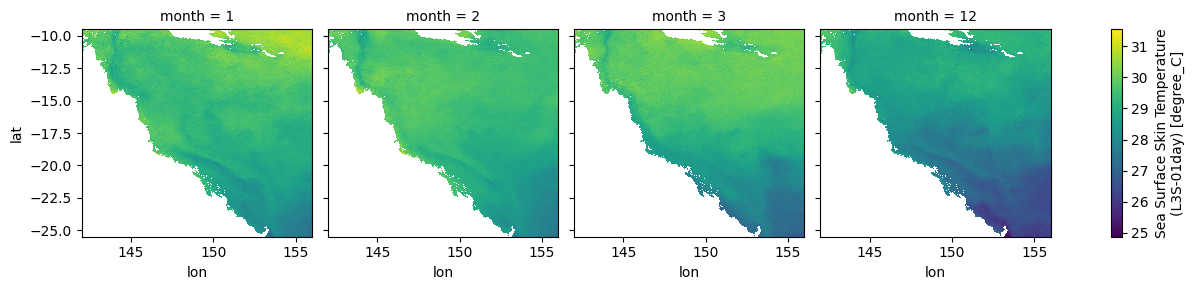

In [35]:
sst1day_2024_monthly.plot(col='month', col_wrap=4)

## The demo for BOM sst plotting by using zarr

In [36]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from matplotlib.colors import ListedColormap
import pandas as pd
from shapely.geometry import box
import cmocean as cmo


In [37]:
# Define the domain (GBR REGION) for the plot
lat_min = -25.5
lat_max = -10.0
lon_min = 142.0
lon_max = 155.0

# Define custom color palette for sst plot
ReeftempNG_sst = [
    '#6B9E56', '#9EC08A', '#D1E2BE', '#FFFFCC', '#FFFF00', '#FFE900', 
    '#FFBF00', '#FF8A00', '#FF5F00', '#FF0900', '#EB0000', '#B30000', 
    '#890000', '#4C0000', '#390000', '#130000'
]

# Define colorbar ticks for sst plot
colbar_ticks = np.arange(0, 170, 10)  # 0 to 160 in increments of 10

# Define major cities with their latitudes and longitudes
major_cities = [
    {"name": "Sydney", "lat": -33.8688, "lon": 151.2093},
    {"name": "Brisbane", "lat": -27.4698, "lon": 153.0251},
    {"name": "Perth", "lat": -31.9505, "lon": 115.8605},
    {"name": "Adelaide", "lat": -34.9285, "lon": 138.6007},
    {"name": "Darwin", "lat": -12.46113, "lon": 130.84185},
    {"name": "Townsville", "lat": -19.26639, "lon": 146.80569},
    {"name": "Cairns", "lat": -16.92366, "lon": 145.76613},
    {"name": "Rockhampton", "lat": -23.38032, "lon": 150.50595}
]

def round_to_nearest_5(value):
    return round(value / 5) * 5

# The function refers the BOM austemp repo and modified for sst plot by using zarr
# https://github.com/bomRob/austemp/blob/dev/src/plot_sst.py
def plot_sst_by_date(
    zarr, 
    variable,
    date, 
    lat_min, 
    lat_max, 
    lon_min, 
    lon_max, 
    title,
    output_file=None, 
    marine_parks_file=None
):
    """
    Plot the Degree Heating Days (sst) data for a specific date by using zarr.
    
    Parameters:
        zarr (xr.Dataset): The xarray dataset containing the sst data.
        variable (str): The variable name chose from zarr variables.
        date (str): The date in the format 'YYYY-MM-DD' to plot.
        lat_min (float): The minimum latitude for the plot domain.
        lat_max (float): The maximum latitude for the plot domain.
        lon_min (float): The minimum longitude for the plot domain.
        lon_max (float): The maximum longitude for the plot domain.
        output_file (str): The file path to save the plot as an image (e.g., 'sst_plot.png').
        marine_parks_file (str): The file path to the marine parks shapefile for plotting.
    """
    
    plt.figure(figsize=(10, 8), dpi=120)
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Select the sst data for the given date and variable
    data = zarr.sel(time=date)[variable]

    # Set plot extent based on domain
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    data = data.squeeze()

    # Set SST values of 0 to NaN, so they will be plotted as white (or handle invalid data as needed)
    data = data.where(~np.isnan(data), np.nan)

    # # Get the min and max values of the data for color bar scaling
    # if np.isnan(data.min().values) or np.isnan(data.max().values):
    #     vmin = 5
    #     vmax = 30
    # else:
    #     vmin = round_to_nearest_5(data.min().values)
    #     vmax = round_to_nearest_5(data.max().values)

    vmin = 5
    vmax = 30
    
    # Plot the SST data
    sst_plot = data.plot(ax=ax, transform=ccrs.PlateCarree(), 
                         cmap = 'cmo.thermal',
                         cbar_kwargs={'label': '(°C)'},
                         vmin=vmin, vmax=vmax)
    
    
    # Add land and coastlines
    ax.add_feature(cfeature.LAND, edgecolor='k', facecolor='#D3D3D3', zorder=100)
    ax.add_feature(cfeature.COASTLINE, zorder=101)

    # Add major cities to the plot if they are within the domain
    for city in major_cities:
        if lat_min <= city["lat"] <= lat_max and lon_min <= city["lon"] <= lon_max:
            # Plot black point for the city
            ax.plot(city["lon"], city["lat"], marker='o', color='black', markersize=5, 
                    transform=ccrs.PlateCarree(), zorder=110)
            
            # Add label to the left of the city point
            ax.text(city["lon"] - 0.2, city["lat"], city["name"], transform=ccrs.PlateCarree(), 
                    fontsize=10, verticalalignment='center', horizontalalignment='right', 
                    zorder=111, color='black')
    
    # Add marine park boundaries if provided
    if marine_parks_file is not None:
        marine_parks = gpd.read_file(marine_parks_file)

        # Filter for GBR and Australian EEZ parks
        marine_parks_gbr = marine_parks[marine_parks['NAME'].str.contains("Great Barrier Reef", case=False)]

        # Define bounding box for the lat/lon bounds
        bounding_box = box(lon_min, lat_min, lon_max, lat_max)
        
        # Clip the parks to the bounding box
        marine_parks_gbr_clipped = gpd.clip(marine_parks_gbr, bounding_box)

        # Plot the clipped marine parks
        ax.add_geometries(marine_parks_gbr_clipped.geometry, crs=ccrs.PlateCarree(), facecolor='none', 
                          edgecolor='black', linewidth=1, zorder=105, label='GBR Area')

    # Add grid labels
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, zorder=111)
    gl.top_labels = False  # Disable top labels
    gl.right_labels = False  # Disable right labels
    gl.left_labels = True   # Enable left labels (latitude)
    gl.bottom_labels = True  # Enable bottom labels (longitude)

    # Manually add a small legend in the bottom-left corner
    legend_x = 0.02  # x position of the legend box
    legend_y = 0.05  # y position of the legend box

    # Add a white box for "No Data"
    ax.add_patch(mpatches.Rectangle((legend_x, legend_y), 0.02, 0.02, transform=ax.transAxes, 
                                    color='white', ec='black', lw=1, zorder=112))
    ax.text(legend_x + 0.03, legend_y + 0.01, "No Data", transform=ax.transAxes, 
            fontsize=10, verticalalignment='center', zorder=113)

    # Add a light grey box for "Land"
    ax.add_patch(mpatches.Rectangle((legend_x, legend_y - 0.03), 0.02, 0.02, transform=ax.transAxes, 
                                    color='#D3D3D3', ec='black', lw=1, zorder=112))
    ax.text(legend_x + 0.03, legend_y - 0.02, "Land", transform=ax.transAxes, 
            fontsize=10, verticalalignment='center', zorder=113)

    # Add thick black border using plt.Rectangle
    rect = plt.Rectangle((0, 0), 1, 1, transform=ax.transAxes, 
                         linewidth=3, edgecolor='black', facecolor='none', zorder=120)
    ax.add_patch(rect)

    # Save the plot
    plt.title(title)
    
    if output_file is not None:
        plt.savefig(output_file, bbox_inches='tight')
        print(f"Plot saved to {output_file}")
    # plt.close()

### Plot the variable "sst" for a specific date from zarr

Plot saved to sst_plot_2024-03-30.png


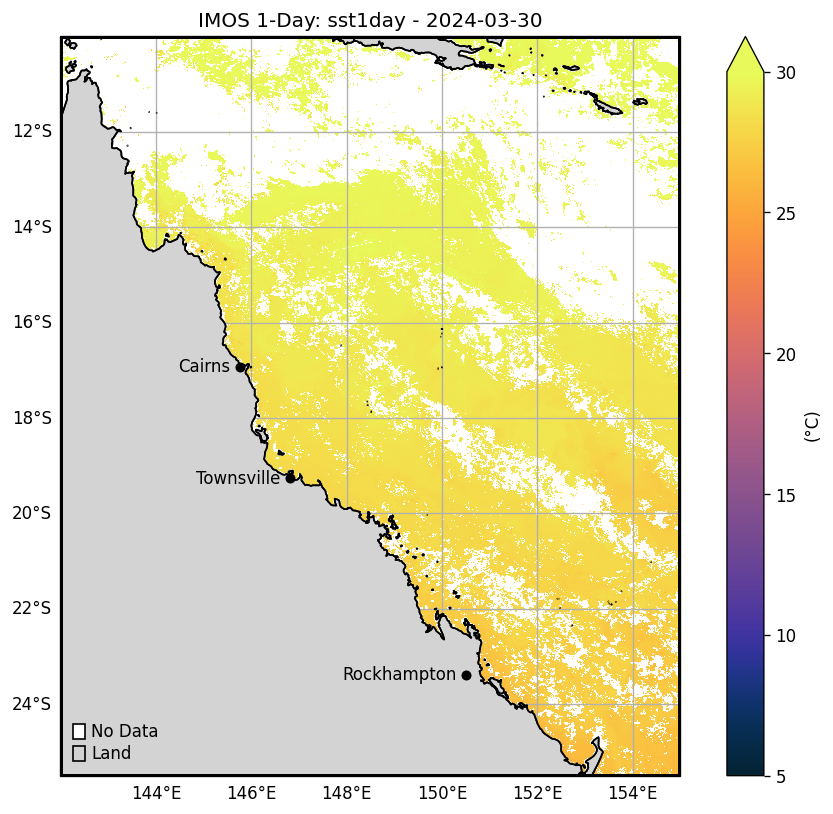

In [38]:

selected_date = "2024-03-30"
variable = "sst1day"
output_file = f"sst_plot_{selected_date}.png"
# Define the date for the plot
title = f"IMOS 1-Day: { variable} - {selected_date}"
plot_sst_by_date(data, variable, selected_date, lat_min, lat_max, lon_min, lon_max, title, output_file=output_file)

Plot saved to sst_plot_2024-03-30.png


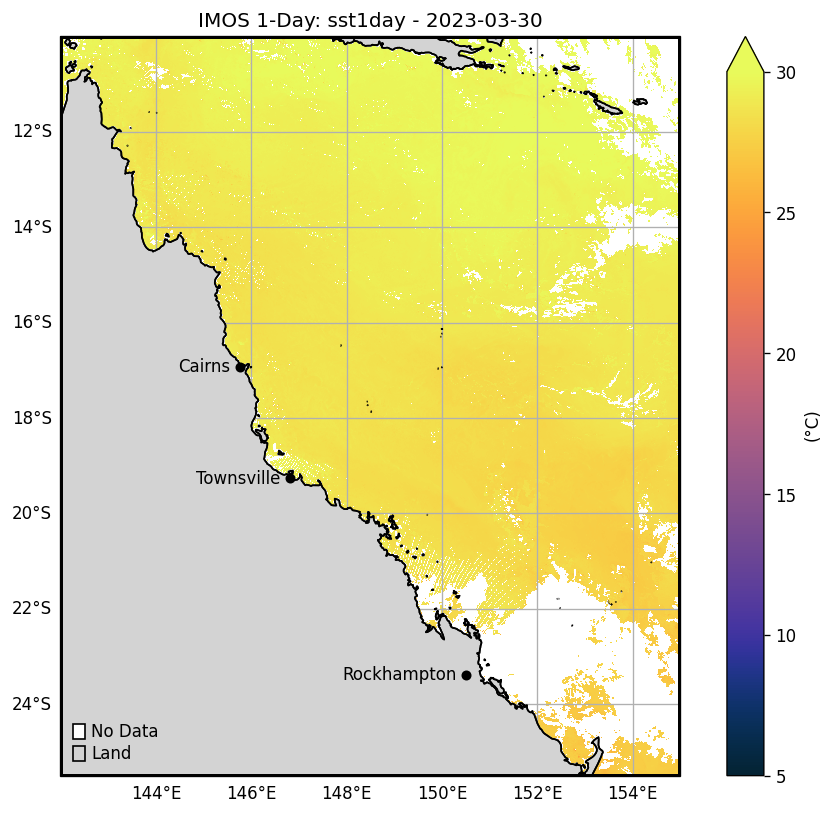

In [39]:
# Year-over-year comparison on the same date
selected_date = "2023-03-30"
variable = "sst1day"

# No output file specified, not saving the plot
title = f"IMOS 1-Day: { variable} - {selected_date}"
plot_sst_by_date(data, variable, selected_date, lat_min, lat_max, lon_min, lon_max, title, output_file=output_file)

Plot saved to sst_plot_2024-03-30.png


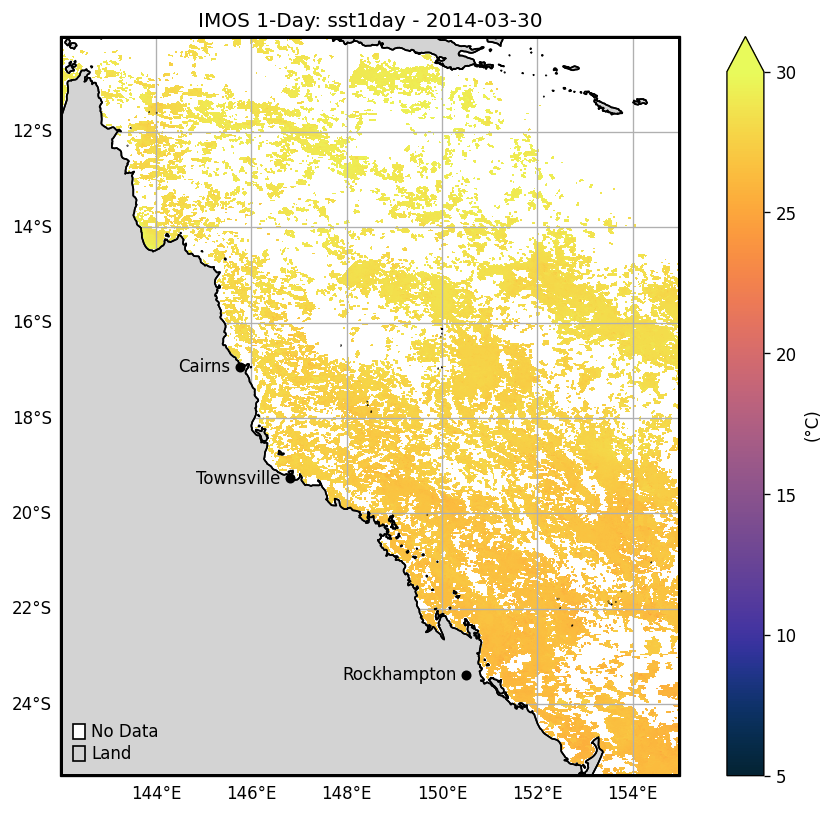

In [40]:
# Year-over-year comparison on the same date
selected_date = "2014-03-30"
variable = "sst1day"

# No output file specified, not saving the plot
title = f"IMOS 1-Day: { variable} - {selected_date}"
plot_sst_by_date(data, variable, selected_date, lat_min, lat_max, lon_min, lon_max, title, output_file=output_file)

### Plot the variable "sst_mosaic" for a specific date from zarr

Plot saved to sst_mosaic_plot_2024-03-30.png


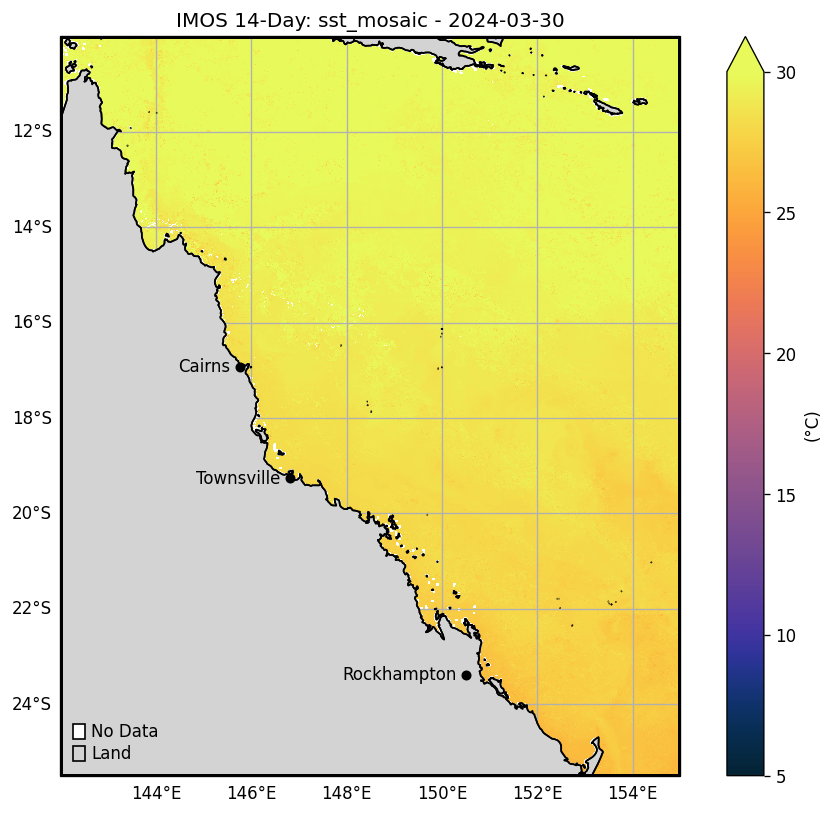

In [41]:
selected_date = "2024-03-30"
variable = "sst_mosaic"
output_file = f"sst_mosaic_plot_{selected_date}.png"
title = f"IMOS 14-Day: { variable} - {selected_date}"
plot_sst_by_date(data, variable, selected_date, lat_min, lat_max, lon_min, lon_max, title, output_file=output_file)

Plot saved to sst_mosaic_plot_2024-03-30.png


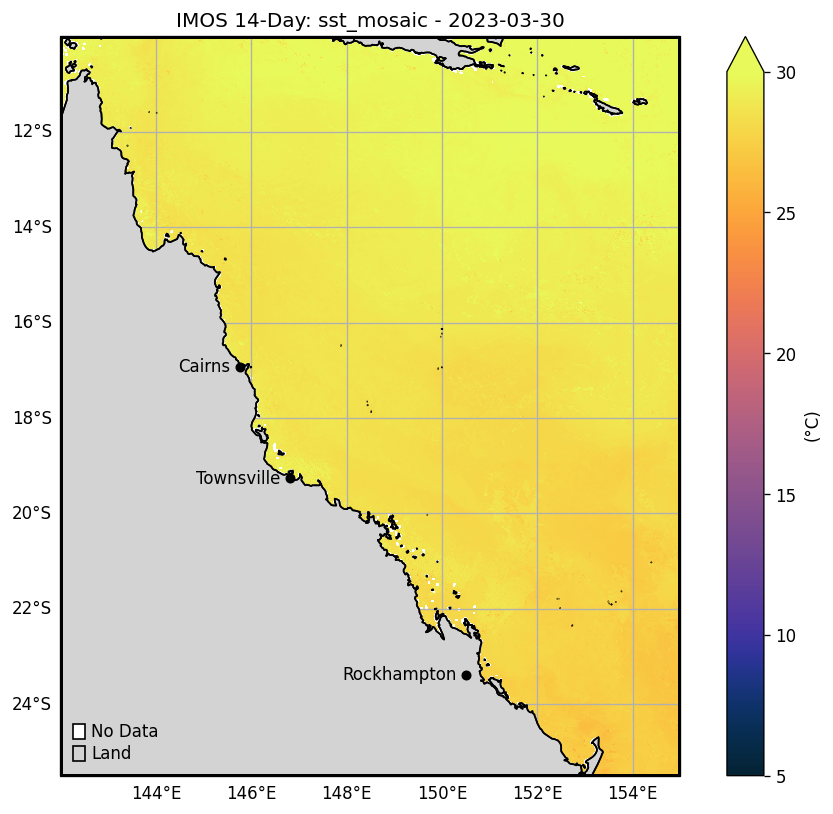

In [42]:
# Year-over-year comparison on the same date
selected_date = "2023-03-30"
variable = "sst_mosaic"

title = f"IMOS 14-Day: { variable} - {selected_date}"
plot_sst_by_date(data, variable, selected_date, lat_min, lat_max, lon_min, lon_max, title, output_file=output_file)

### Plot the variable "ssta_mosaic_imos" for a specific date from zarr

In [43]:
# Define the domain (GBR REGION) for the plot
lat_min = -25.5
lat_max = -10.0
lon_min = 142.0
lon_max = 155.0

# Define custom color palette for sst plot
ReeftempNG_sst = [
    '#6B9E56', '#9EC08A', '#D1E2BE', '#FFFFCC', '#FFFF00', '#FFE900', 
    '#FFBF00', '#FF8A00', '#FF5F00', '#FF0900', '#EB0000', '#B30000', 
    '#890000', '#4C0000', '#390000', '#130000'
]

# Define colorbar ticks for sst plot
colbar_ticks = np.arange(0, 170, 10)  # 0 to 160 in increments of 10

# Define major cities with their latitudes and longitudes
major_cities = [
    {"name": "Sydney", "lat": -33.8688, "lon": 151.2093},
    {"name": "Brisbane", "lat": -27.4698, "lon": 153.0251},
    {"name": "Perth", "lat": -31.9505, "lon": 115.8605},
    {"name": "Adelaide", "lat": -34.9285, "lon": 138.6007},
    {"name": "Darwin", "lat": -12.46113, "lon": 130.84185},
    {"name": "Townsville", "lat": -19.26639, "lon": 146.80569},
    {"name": "Cairns", "lat": -16.92366, "lon": 145.76613},
    {"name": "Rockhampton", "lat": -23.38032, "lon": 150.50595}
]

def round_to_nearest_5(value):
    return round(value / 5) * 5

# The function refers the BOM austemp repo and modified for sst plot by using zarr
# https://github.com/bomRob/austemp/blob/dev/src/plot_sst.py
def plot_ssta_by_date(
    zarr, 
    variable,
    date, 
    lat_min, 
    lat_max, 
    lon_min, 
    lon_max, 
    title,
    output_file=None, 
    marine_parks_file=None
):
    """
    Plot the Degree Heating Days (sst) data for a specific date by using zarr.
    
    Parameters:
        zarr (xr.Dataset): The xarray dataset containing the sst data.
        variable (str): The variable name chose from zarr variables.
        date (str): The date in the format 'YYYY-MM-DD' to plot.
        lat_min (float): The minimum latitude for the plot domain.
        lat_max (float): The maximum latitude for the plot domain.
        lon_min (float): The minimum longitude for the plot domain.
        lon_max (float): The maximum longitude for the plot domain.
        output_file (str): The file path to save the plot as an image (e.g., 'sst_plot.png').
        marine_parks_file (str): The file path to the marine parks shapefile for plotting.
    """
    
    plt.figure(figsize=(10, 8), dpi=120)
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Select the sst data for the given date and variable
    data = zarr.sel(time=date)[variable]

    # Set plot extent based on domain
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    data = data.squeeze()

    # Set SST values of 0 to NaN, so they will be plotted as white (or handle invalid data as needed)
    data = data.where(~np.isnan(data), np.nan)

    vmin = -5
    vmax = 5
        
    # Plot the SST data
    sst_plot = data.plot(ax=ax, transform=ccrs.PlateCarree(), 
                         cmap = 'cmo.balance',
                         cbar_kwargs={'label': '(°C)'},
                         vmin=vmin, vmax=vmax)
    
    
    # Add land and coastlines
    ax.add_feature(cfeature.LAND, edgecolor='k', facecolor='#D3D3D3', zorder=100)
    ax.add_feature(cfeature.COASTLINE, zorder=101)

    # Add major cities to the plot if they are within the domain
    for city in major_cities:
        if lat_min <= city["lat"] <= lat_max and lon_min <= city["lon"] <= lon_max:
            # Plot black point for the city
            ax.plot(city["lon"], city["lat"], marker='o', color='black', markersize=5, 
                    transform=ccrs.PlateCarree(), zorder=110)
            
            # Add label to the left of the city point
            ax.text(city["lon"] - 0.2, city["lat"], city["name"], transform=ccrs.PlateCarree(), 
                    fontsize=10, verticalalignment='center', horizontalalignment='right', 
                    zorder=111, color='black')
    
    # Add marine park boundaries if provided
    if marine_parks_file is not None:
        marine_parks = gpd.read_file(marine_parks_file)

        # Filter for GBR and Australian EEZ parks
        marine_parks_gbr = marine_parks[marine_parks['NAME'].str.contains("Great Barrier Reef", case=False)]

        # Define bounding box for the lat/lon bounds
        bounding_box = box(lon_min, lat_min, lon_max, lat_max)
        
        # Clip the parks to the bounding box
        marine_parks_gbr_clipped = gpd.clip(marine_parks_gbr, bounding_box)

        # Plot the clipped marine parks
        ax.add_geometries(marine_parks_gbr_clipped.geometry, crs=ccrs.PlateCarree(), facecolor='none', 
                          edgecolor='black', linewidth=1, zorder=105, label='GBR Area')

    # Add grid labels
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, zorder=111)
    gl.top_labels = False  # Disable top labels
    gl.right_labels = False  # Disable right labels
    gl.left_labels = True   # Enable left labels (latitude)
    gl.bottom_labels = True  # Enable bottom labels (longitude)

    # Manually add a small legend in the bottom-left corner
    legend_x = 0.02  # x position of the legend box
    legend_y = 0.05  # y position of the legend box

    # Add a white box for "No Data"
    ax.add_patch(mpatches.Rectangle((legend_x, legend_y), 0.02, 0.02, transform=ax.transAxes, 
                                    color='white', ec='black', lw=1, zorder=112))
    ax.text(legend_x + 0.03, legend_y + 0.01, "No Data", transform=ax.transAxes, 
            fontsize=10, verticalalignment='center', zorder=113)

    # Add a light grey box for "Land"
    ax.add_patch(mpatches.Rectangle((legend_x, legend_y - 0.03), 0.02, 0.02, transform=ax.transAxes, 
                                    color='#D3D3D3', ec='black', lw=1, zorder=112))
    ax.text(legend_x + 0.03, legend_y - 0.02, "Land", transform=ax.transAxes, 
            fontsize=10, verticalalignment='center', zorder=113)

    # Add thick black border using plt.Rectangle
    rect = plt.Rectangle((0, 0), 1, 1, transform=ax.transAxes, 
                         linewidth=3, edgecolor='black', facecolor='none', zorder=120)
    ax.add_patch(rect)

    # Save the plot
    plt.title(title)
    
    if output_file is not None:
        plt.savefig(output_file, bbox_inches='tight')
        print(f"Plot saved to {output_file}")
    # plt.close()

Plot saved to ssta_mosaic_plot_2024-03-30.png


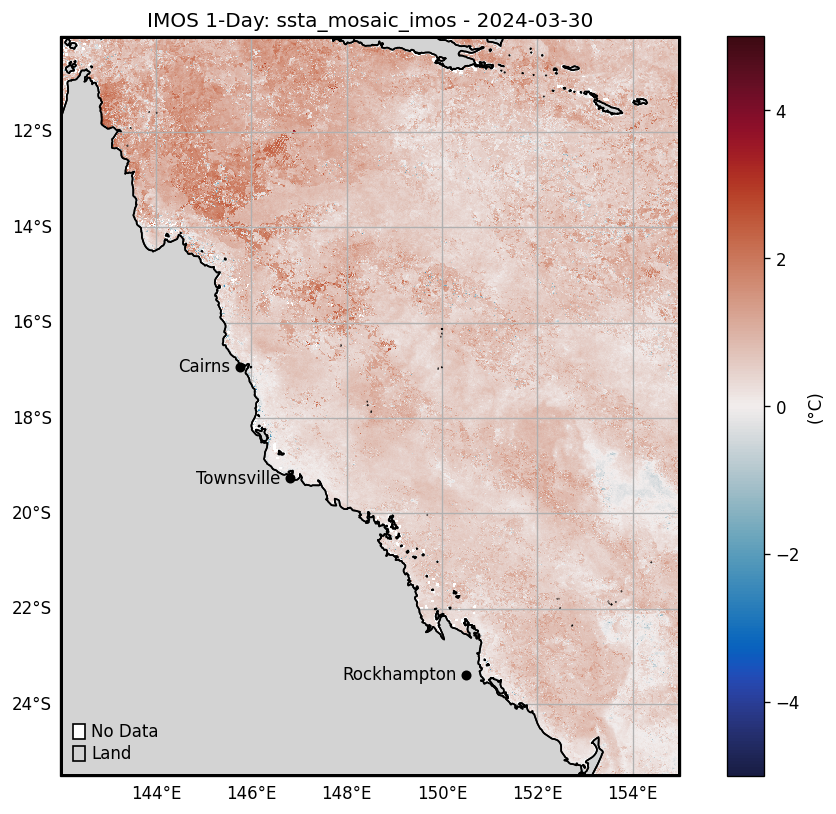

In [44]:
selected_date = "2024-03-30"
variable = "ssta_mosaic_imos"
output_file = f"ssta_mosaic_plot_{selected_date}.png"

title = f"IMOS 1-Day: { variable} - {selected_date}"
plot_ssta_by_date(data, variable, selected_date, lat_min, lat_max, lon_min, lon_max, title, output_file=output_file)

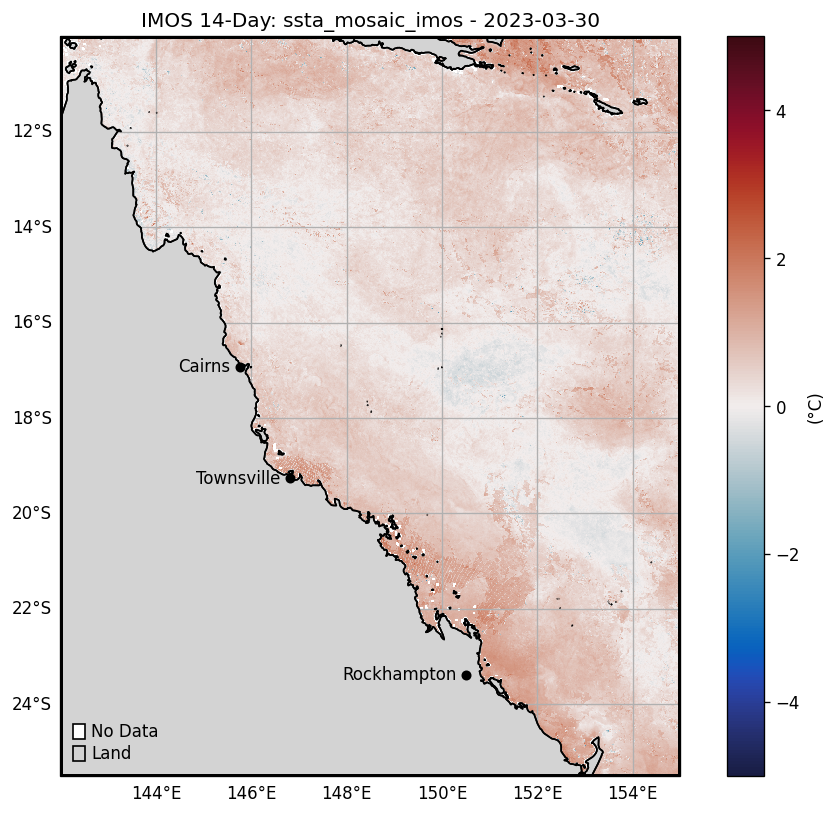

In [45]:
# Year-over-year comparison on the same date
selected_date = "2023-03-30"
variable = "ssta_mosaic_imos"

title = f"IMOS 14-Day: { variable} - {selected_date}"
plot_ssta_by_date(data, variable, selected_date, lat_min, lat_max, lon_min, lon_max, title)

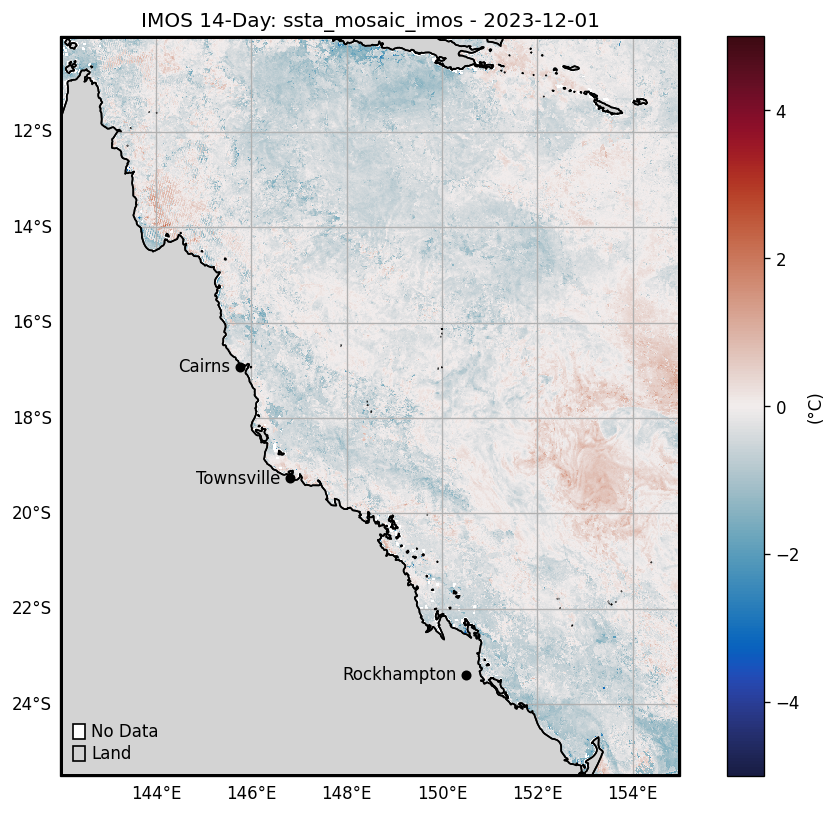

In [46]:
# Compare the ssta_mosaic for different day on the same summer 
selected_date = "2023-12-01"
variable = "ssta_mosaic_imos"

title = f"IMOS 14-Day: { variable} - {selected_date}"
plot_ssta_by_date(data, variable, selected_date, lat_min, lat_max, lon_min, lon_max, title)